<h1>WACM Formulas: Statistical Feedback</h1>
<h2>Polansky/Kant</h2>
<h3>6/21/14</h3>
<h4>(Thanks to Douglas Repetto!)</h4>

In [1]:
# imports
import random
import matplotlib.pyplot as plt
import numpy as np
import pretty_midi
import midi
%matplotlib inline

In [2]:
# a basic (but flexible!) implementation of statistical feedback
# the default growth function is growth(count) = count**alpha for alpha=1
# number of elements is equal to length of the counts list

def wchoose(weights):
    '''
    returns index of choice from a weighted distribution
    '''
    break_points = np.cumsum(weights).tolist()
    index = random.random()*break_points[-1]
    return sum([bp<=index for bp in break_points])
    
def statchoose(weights, counts, alpha=1, dropdown=0):
    '''
    statistical feedback, returns index of choice and new weights
    '''
    growth = lambda count: count**float(alpha)                                      # exponential growth function
    reset = lambda count: float(dropdown)                                           # reset to dropdown when chosen
    probs = [w*growth(c) if c != 0 else w*reset(c) for w,c in zip(weights,counts)]  # compute probabilites
    probs = [p/sum(probs) for p in probs]                                           # and normalize them
    index = wchoose(probs)                                                          # choose
    counts = [c+1 if i != index else 0 for i,c in enumerate(counts)]                # update counts
    return index, counts, probs

# a more general implementation allows any growth or reset function
# def statchoose(weights, counts, growth=lambda c: c**1.0, reset=lambda c: 0.0):
#     '''
#     statistical feedback, returns index of choice and new weights
#     '''
#     probs = [w*growth(c) if c != 0 else w*reset(c) for w,c in zip(weights,counts)]  # compute probabilites
#     probs = [p/sum(probs) for p in probs]                                           # and normalize them
#     index = wchoose(probs)                                                          # choose
#     counts = [c+1 if i != index else 0 for i,c in enumerate(counts)]                # update counts
#     return index, counts, probs


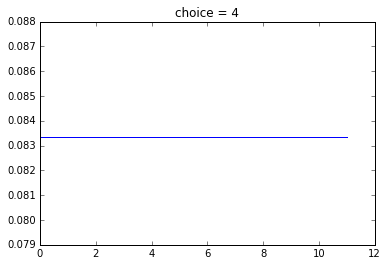

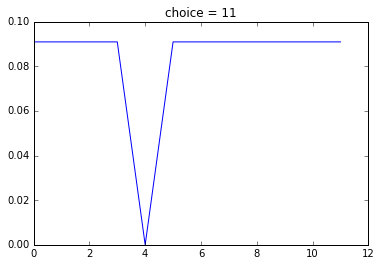

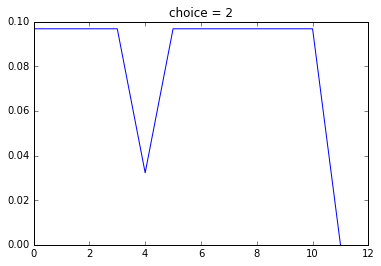

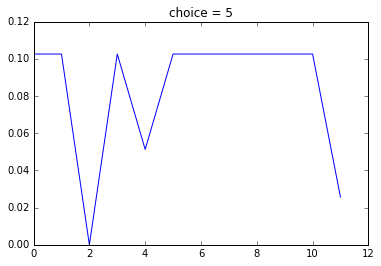

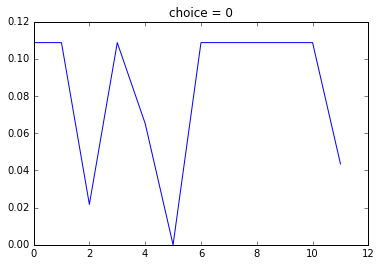

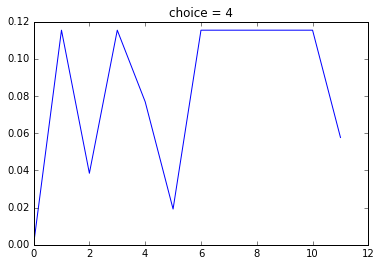

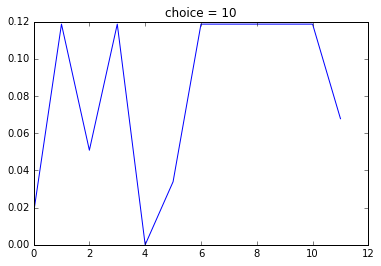

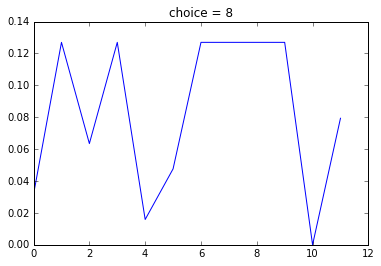

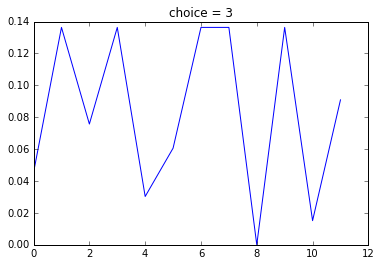

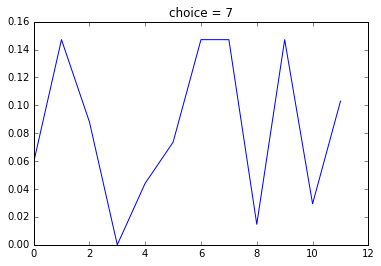

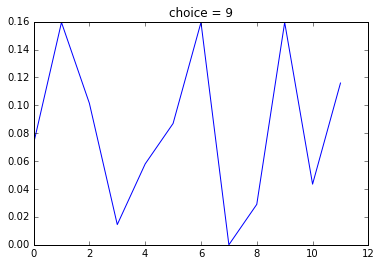

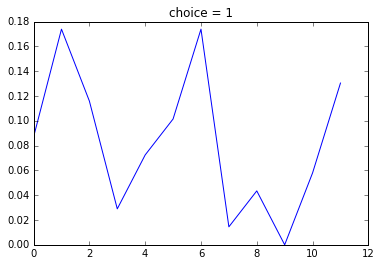

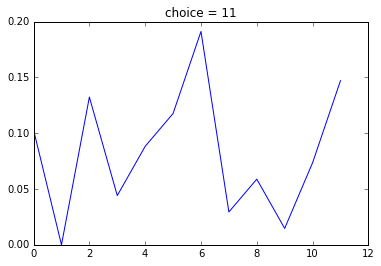

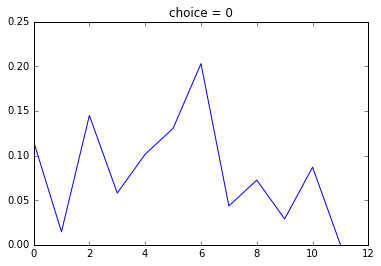

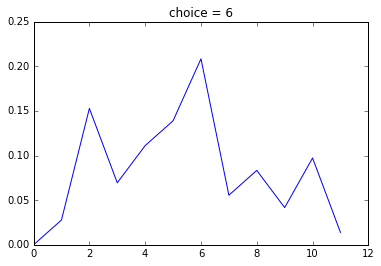

In [3]:
# run it and plot the probability distributions

num_runs = 15              # run it 10 times
num_elems = 12             # 12 elements
weights = [1]*num_elems    # initialize weights to 1
counts = [1]*num_elems     # initialize counts to 1
    
for i in range(num_runs):
    choice, counts, probs = statchoose(weights, counts)
    plt.figure()
    plt.title('choice = ' + str(choice))
    plt.plot(probs);

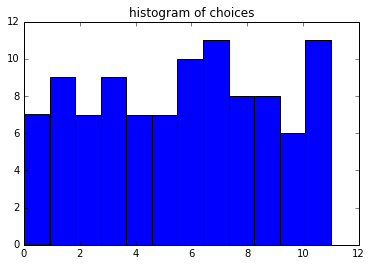

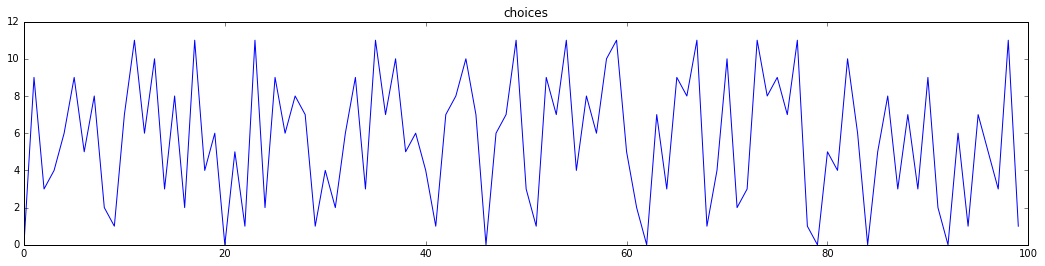

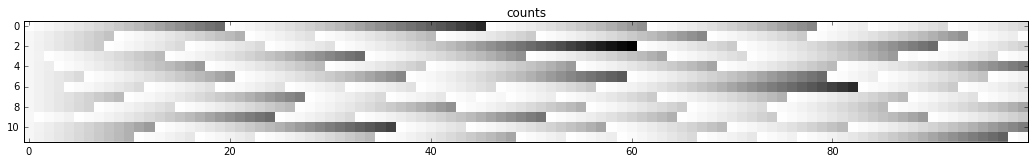

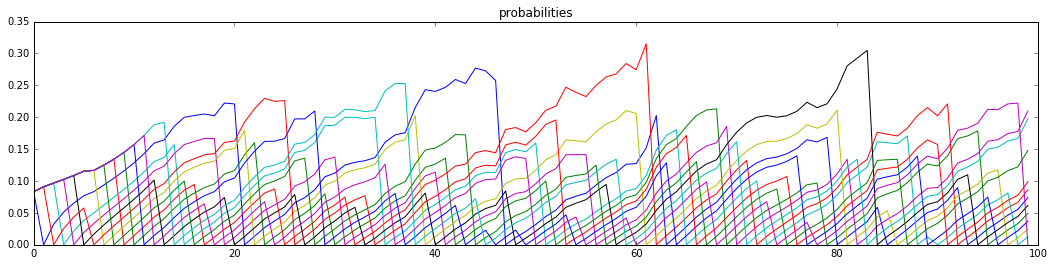

In [4]:
# run it and plot the choices

num_runs = 100               # run it 60 times
num_elems = 12              # 12 elements
weights = [1]*num_elems     # initialize weights to 1
counts = [1]*num_elems      # initialize counts to 1

# run it
choices = []         # store list of choices here
probs_history = []   # store list of probs here
counts_history = []  # store list of counts here
for i in range(num_runs):
    choice, counts, probs = statchoose(weights, counts)
    choices += [choice]
    probs_history.append(probs)
    counts_history.append(counts)
   
# plot histogram of choices
plt.figure()
plt.title('histogram of choices')
plt.hist(choices, bins=num_elems);

# plot choices
plt.figure()
plt.figure(figsize=(18, 4))
plt.title('choices')
plt.plot(choices);

# plot counts
counts_history = np.array(counts_history)
plt.figure(figsize=(18, 4))
plt.title('counts')
imgplot = plt.imshow(counts_history.transpose(), cmap = plt.cm.Greys)
imgplot.set_interpolation('none')

# plot probabilites
plt.figure(figsize=(18, 4))
plt.title('probabilities')
plt.plot(probs_history);

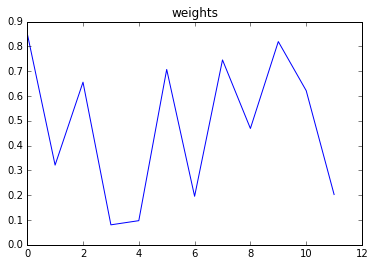

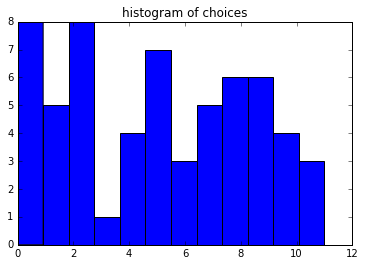

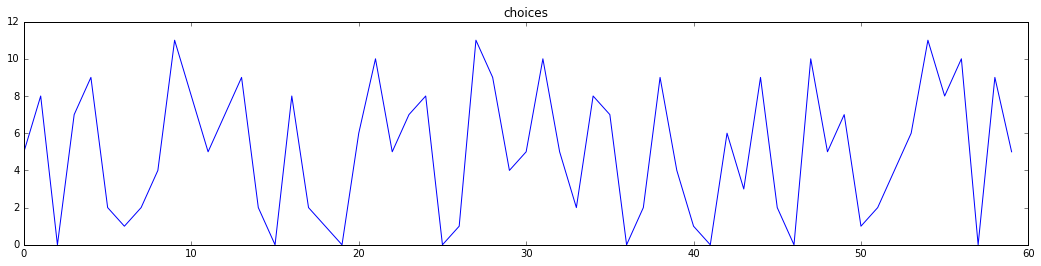

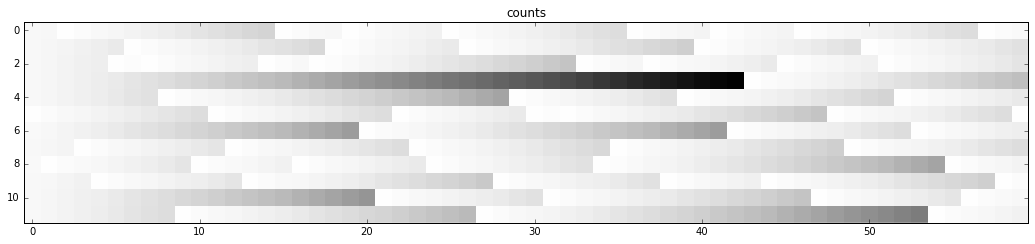

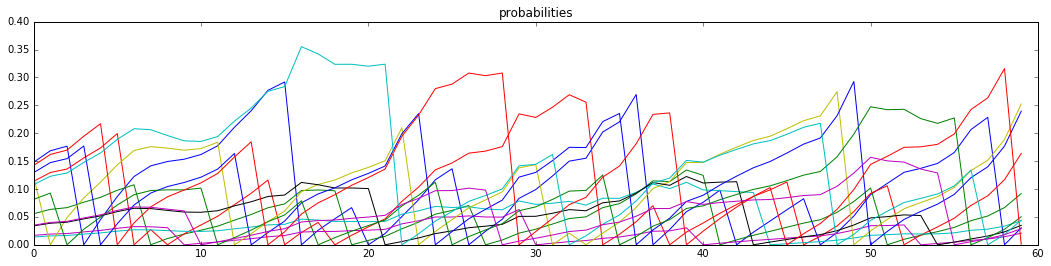

In [5]:
# now let's see a weighted distrubution

num_runs = 60                                          # run it 100 times
num_elems = 12                                         # 12 elements
weights = [random.random() for i in range(num_elems)]  # initialize weights randomly
counts = [1]*num_elems                                 # initialize counts to 1

# run it
choices = []         # store list of choices here
probs_history = []   # store list of probs here
counts_history = []  # store list of counts here
for i in range(num_runs):
    choice, counts, probs = statchoose(weights, counts)
    choices += [choice]
    probs_history.append(probs)
    counts_history.append(counts)

# plot the weights
plt.figure()
plt.title('weights')
plt.plot(weights)
    
# plot histogram of choices
plt.figure()
plt.title('histogram of choices')
plt.hist(choices, bins=12);

# plot choices
plt.figure()
plt.figure(figsize=(18, 4))
plt.title('choices')
plt.plot(choices);

# plot counts
counts_history = np.array(counts_history)
plt.figure(figsize=(18, 4))
plt.title('counts')
imgplot = plt.imshow(counts_history.transpose(), cmap = plt.cm.Greys);
imgplot.set_interpolation('none')

# plot probabilites
plt.figure(figsize=(18, 4))
plt.title('probabilities')
plt.plot(probs_history);

size is(150, 12)


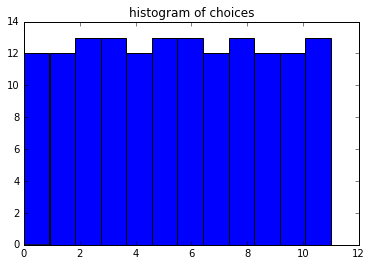

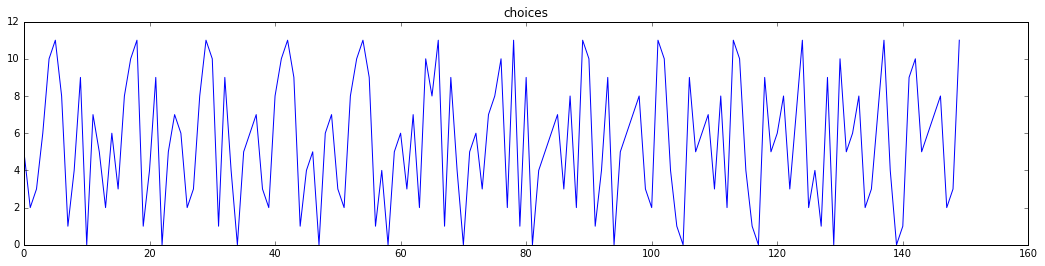

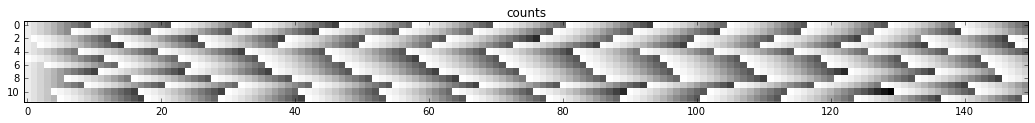

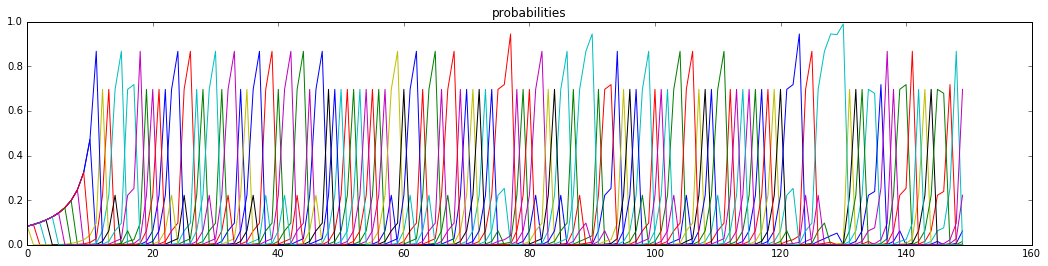

In [6]:
# let's change the growth exponent to 4

num_runs = 150            # run it 100 times
num_elems = 12           # 12 elements 
alpha = 12
weights = [1]*num_elems  # initialize weights to 1
counts = [1]*num_elems   # initialize counts to 1

# run it
choices = []         # store list of choices here
probs_history = []   # store list of probs here
counts_history = []  # store list of counts here
for i in range(num_runs):
    choice, counts, probs = statchoose(weights, counts, alpha)
    choices += [choice]
    probs_history.append(probs)
    counts_history.append(counts)
   
# plot histogram of choices
plt.figure()
plt.title('histogram of choices')
plt.hist(choices, bins=12);

# plot choices
plt.figure()
plt.figure(figsize=(18, 4))
plt.title('choices')
plt.plot(choices);

# plot counts
counts_history = np.array(counts_history)
plt.figure(figsize=(18, 4))
plt.title('counts')
print 'size is' + str(counts_history.shape)
imgplot = plt.imshow(counts_history.transpose(), cmap = plt.cm.Greys);
imgplot.set_interpolation('none')

# plot probabilites
plt.figure(figsize=(18, 4))
plt.title('probabilities')
plt.plot(probs_history);

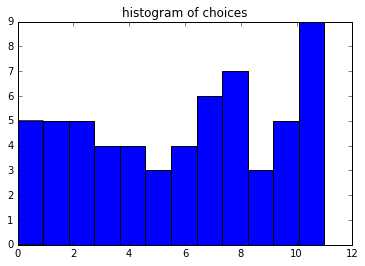

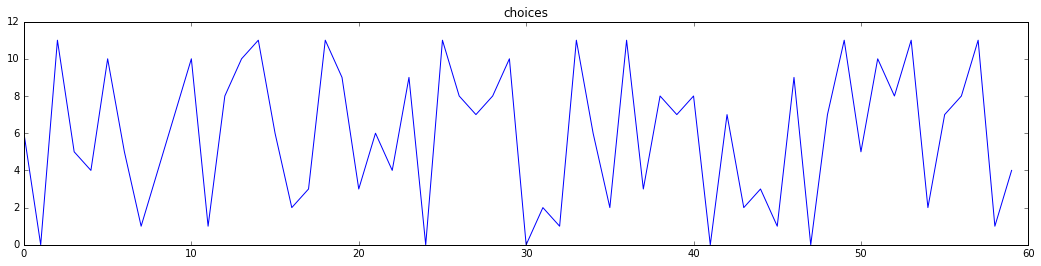

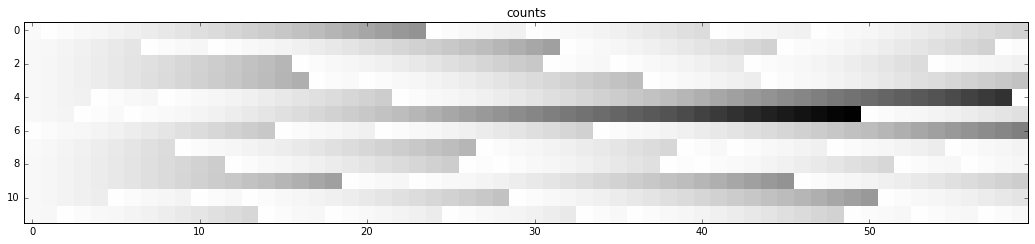

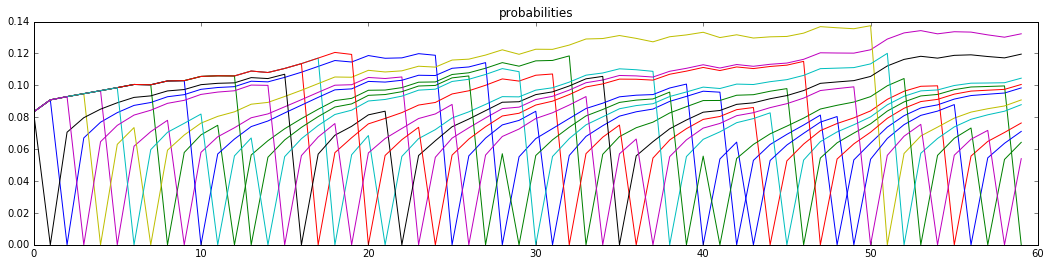

In [7]:
# let's change the growth exponent to 0.25

num_runs = 60            # run it 100 times
num_elems = 12           # 12 elements 
alpha = 0.25
weights = [1]*num_elems  # initialize weights to 1
counts = [1]*num_elems   # initialize counts to 1

# run it
choices = []         # store list of choices here
probs_history = []   # store list of probs here
counts_history = []  # store list of counts here
for i in range(num_runs):
    choice, counts, probs = statchoose(weights, counts, alpha)
    choices += [choice]
    probs_history.append(probs)
    counts_history.append(counts)
   
# plot histogram of choices
plt.figure()
plt.title('histogram of choices')
plt.hist(choices, bins=12);

# plot choices
plt.figure()
plt.figure(figsize=(18, 4))
plt.title('choices')
plt.plot(choices);

# plot counts
counts_history = np.array(counts_history)
plt.figure(figsize=(18, 4))
plt.title('counts')
imgplot = plt.imshow(counts_history.transpose(), cmap = plt.cm.Greys);
imgplot.set_interpolation('none')

# plot probabilites
plt.figure(figsize=(18, 4))
plt.title('probabilities')
plt.plot(probs_history);

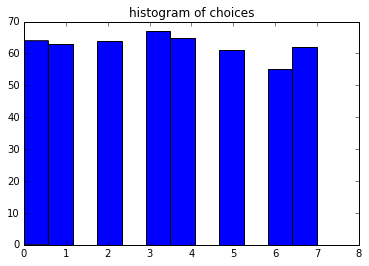

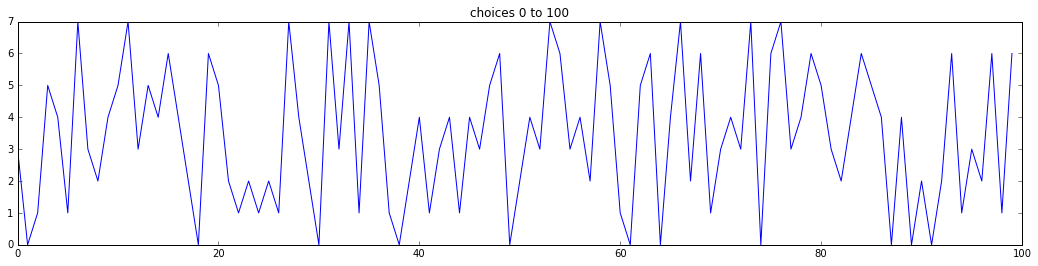

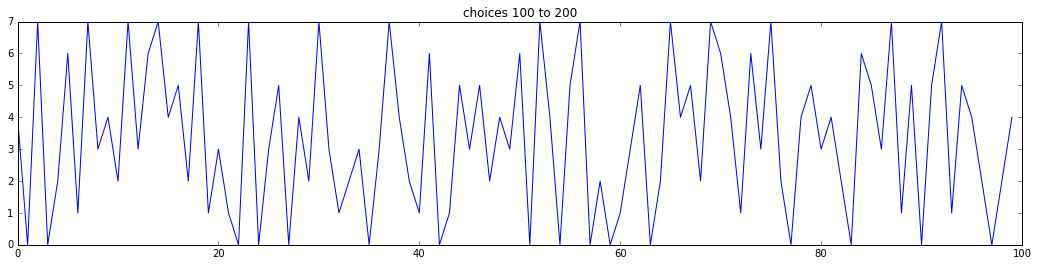

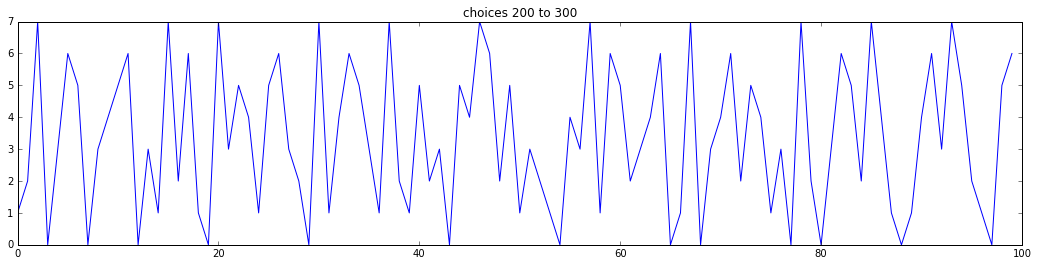

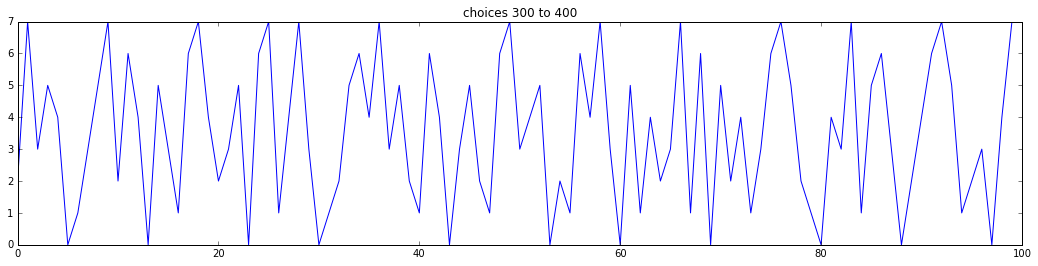

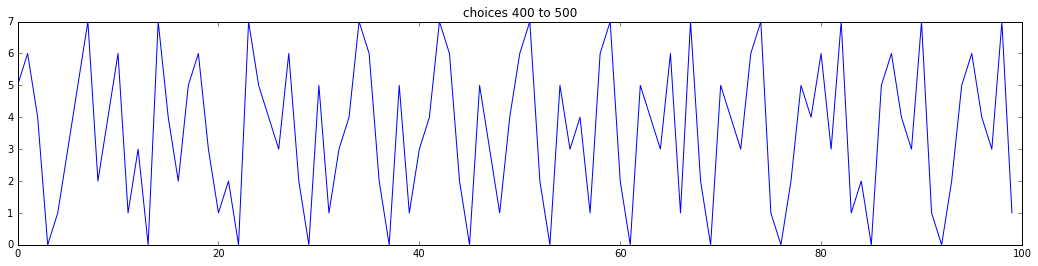

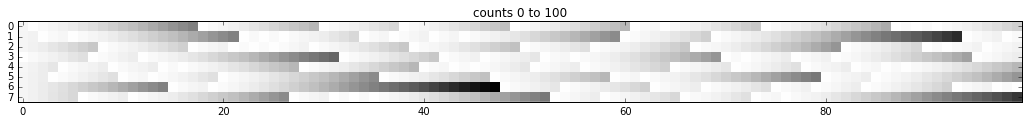

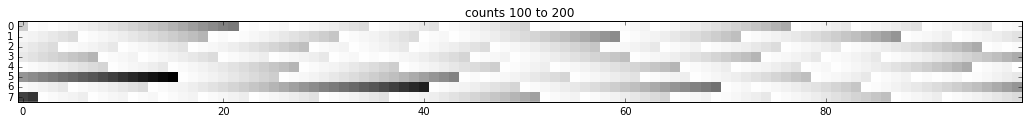

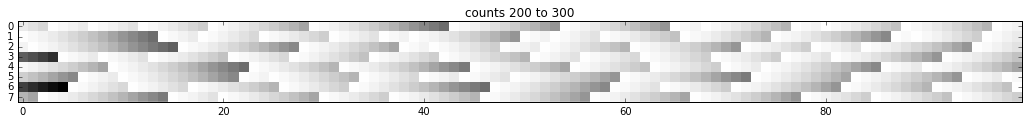

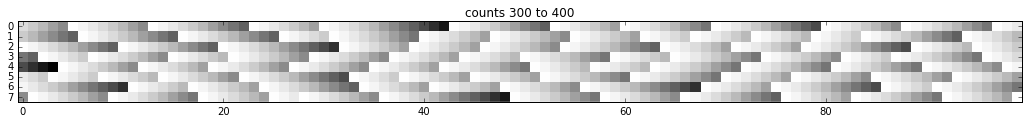

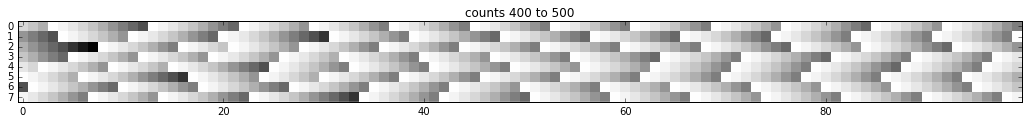

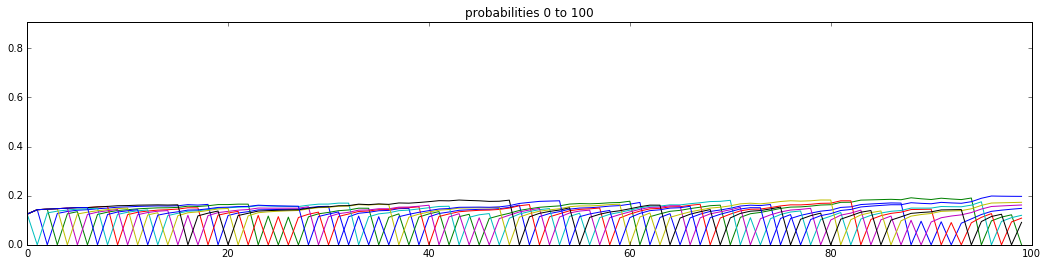

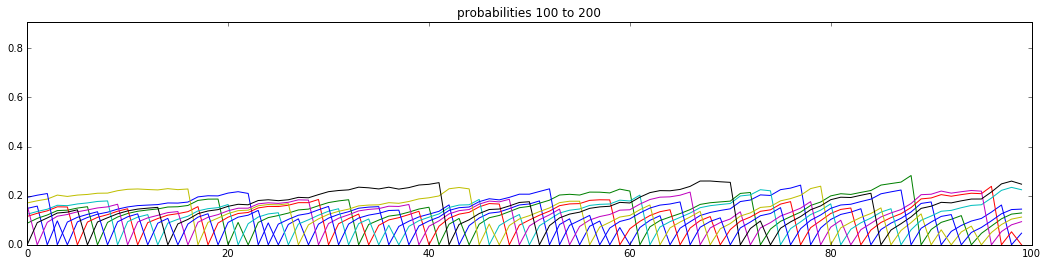

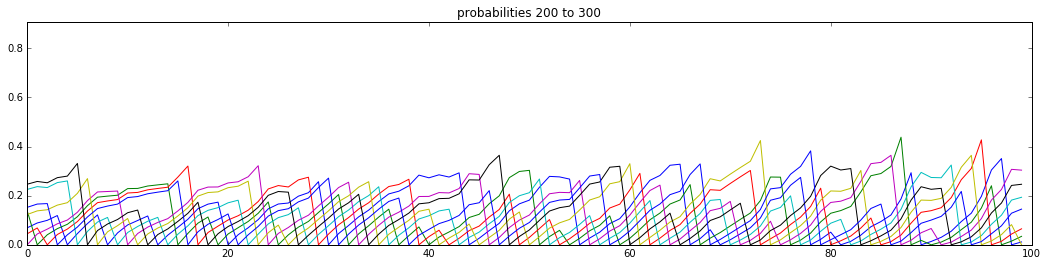

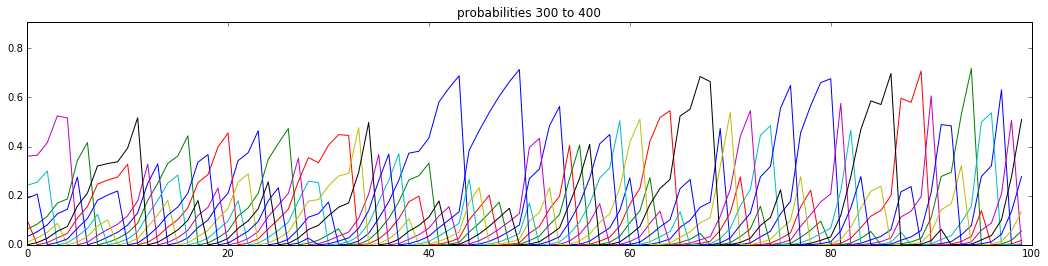

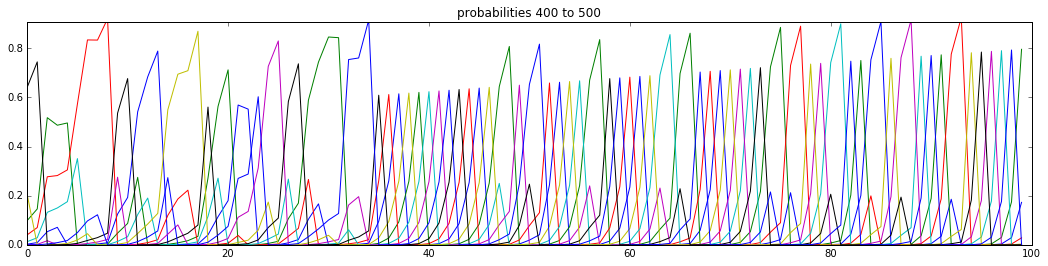

In [8]:
# now, interpolate it!
# we interpolated alpha from .1 to 10 on an exponential scale

num_runs = 500           # run it 500 times
num_elems = 8            # 12 elements 
weights = [1]*num_elems  # initialize weights to 1
counts = [1]*num_elems   # initialize counts to 1

# run it
choices = []         # store list of choices here
probs_history = []   # store list of probs here
counts_history = []  # store list of counts here
for i in [2*i/float(num_runs)-1 for i in range(num_runs+1)]:   # 500 steps -1 to 1
    alpha = 10.0**i 
    choice, counts, probs = statchoose(weights, counts, alpha=alpha)
    choices += [choice]
    probs_history.append(probs)
    counts_history.append(counts)
   
# plot histogram of choices
plt.figure()
plt.title('histogram of choices')
plt.hist(choices, bins=12);
    
# plot choices
for subplot in range(5):
    plt.figure(figsize=(18, 4))
    plt.title('choices ' + str(subplot*100) + ' to ' + str((subplot+1)*100))
    plt.plot(choices[(subplot*100):(subplot+1)*100]);

# plot counts
counts_history = np.array(counts_history)
for subplot in range(5):
    plt.figure(figsize=(18, 4))
    plt.title('counts ' + str(subplot*100) + ' to ' + str((subplot+1)*100))
    imgplot = plt.imshow(counts_history.transpose()[:,(subplot*100):(subplot+1)*100], cmap = plt.cm.Greys);
    imgplot.set_interpolation('none')

# plot probabilites
for subplot in range(5):
    plt.figure(figsize=(18, 4))
    plt.axis([0, 100, min(min(probs_history)), max(max(probs_history))])
    plt.title('probabilities ' + str(subplot*100) + ' to ' + str((subplot+1)*100))
    plt.plot(probs_history[(subplot*100):(subplot+1)*100]);

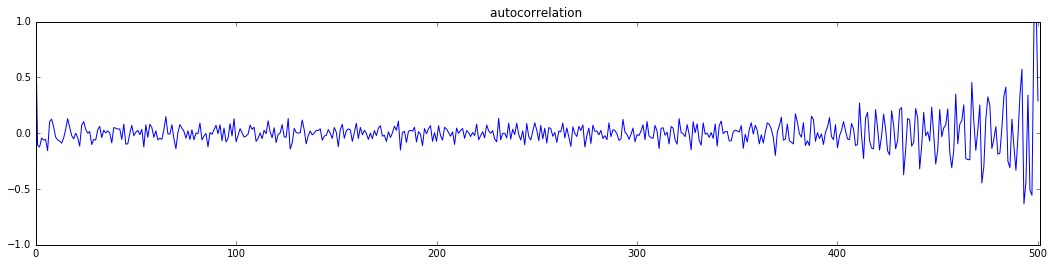

In [9]:
# autocorrelation

def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    # assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

autocorrelation = estimated_autocorrelation(np.array(choices))
plt.figure(figsize=(18, 4))
plt.axis([0, len(autocorrelation), -1, 1])
plt.title('autocorrelation ')
plt.plot(autocorrelation);

In [10]:
# and hear it

pm = pretty_midi.PrettyMIDI()
pm.instruments.append(pretty_midi.Instrument(0))

# midi parameteres
note_dur = 0.125
note_hold = note_dur
velocity = 100

# stuff the pm object
for i,choice in enumerate(choices):
    
    pitch = choice + 60
    note_on = i*note_hold
    note_off = note_on+note_dur
    pm.instruments[0].events.append(pretty_midi.Note(velocity, pitch, note_on, note_off))
    
    # print pitch, note_on, note_off
    
# write it
pm.write("fomulas_statfback1.mid")

AttributeError: 'Instrument' object has no attribute 'events'